<a href="https://colab.research.google.com/github/Emilly-Rosa/Brazilian-E-Commerce-Analysis/blob/main/Brazilian_E_Commerce_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatórios de Dados: Olist e-Commerce

## Importando bibliotecas e o dataset do kaggle

In [308]:
!pip install opendatasets

In [309]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce")

Skipping, found downloaded files in "./brazilian-ecommerce" (use force=True to force download)


In [310]:
# bibliotecas necessárias
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import polars as pl

In [311]:
# importando os datasetsarquivos csv
clientes = pd.read_csv('brazilian-ecommerce/olist_customers_dataset.csv')
pedidosItens = pd.read_csv('brazilian-ecommerce/olist_order_items_dataset.csv')
pedidos = pd.read_csv('brazilian-ecommerce/olist_orders_dataset.csv')
produtos = pd.read_csv('brazilian-ecommerce/olist_products_dataset.csv')
pagamento = pd.read_csv('brazilian-ecommerce/olist_order_payments_dataset.csv')
vendedores = pd.read_csv('brazilian-ecommerce/olist_sellers_dataset.csv')
categoriaProduto = pd.read_csv('brazilian-ecommerce/product_category_name_translation.csv')
localização = pd.read_csv('brazilian-ecommerce/olist_geolocation_dataset.csv')
reviews = pd.read_csv('brazilian-ecommerce/olist_order_reviews_dataset.csv')

# Análise Exploratória

## Traduzindo Colunas

In [312]:
clientes.rename(columns={
    'customer_id': 'id_cliente',
    'customer_unique_id': 'id_cliente_unico',
    'customer_zip_code_prefix': 'prefixo_cep_cliente',
    'customer_city': 'cidade_cliente',
    'customer_state': 'estado_cliente'
}, inplace=True)
display(clientes.head())

,id_cliente,id_cliente_unico,prefixo_cep_cliente,cidade_cliente,estado_cliente
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [313]:
pedidosItens.rename(columns={
    'order_id': 'id_pedido',
    'order_item_id': 'id_item_pedido',
    'product_id': 'id_produto',
    'seller_id': 'id_vendedor',
    'shipping_limit_date': 'data_limite_envio',
    'price': 'preco',
    'freight_value': 'valor_frete'
}, inplace=True)
display(pedidosItens.head())

,id_pedido,id_item_pedido,id_produto,id_vendedor,data_limite_envio,preco,valor_frete
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [314]:
pedidos.rename(columns={
    'order_id': 'id_pedido',
    'customer_id': 'id_cliente',
    'order_status': 'status_pedido',
    'order_purchase_timestamp': 'data_compra',
    'order_approved_at': 'data_aprovacao',
    'order_delivered_carrier_date': 'data_entrega_transportadora',
    'timestamp': 'data_entrega_transportadora',
    'order_delivered_customer_date': 'data_entrega_cliente',
    'order_estimated_delivery_date': 'data_entrega_estimada'
}, inplace=True)
display(pedidos.head())

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [315]:
produtos.rename(columns={
    'product_id': 'id_produto',
    'product_category_name': 'categoria_produto',
    'product_name_lenght': 'tamanho_nome_produto',
    'product_description_lenght': 'tamanho_descricao_produto',
    'product_photos_qty': 'quantidade_fotos_produto',
    'product_weight_g': 'peso_produto_g',
    'product_length_cm': 'comprimento_produto_cm',
    'product_height_cm': 'altura_produto_cm',
    'product_width_cm': 'largura_produto_cm'
}, inplace=True)
display(produtos.head())

,id_produto,categoria_produto,tamanho_nome_produto,tamanho_descricao_produto,quantidade_fotos_produto,peso_produto_g,comprimento_produto_cm,altura_produto_cm,largura_produto_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [316]:
vendedores.rename(columns={
    'seller_id': 'id_vendedor',
    'seller_zip_code_prefix': 'prefixo_cep_vendedor',
    'seller_city': 'cidade_vendedor',
    'seller_state': 'estado_vendedor'
}, inplace=True)
display(vendedores.head())

,id_vendedor,prefixo_cep_vendedor,cidade_vendedor,estado_vendedor
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [317]:
categoriaProduto.rename(columns={
    'product_category_name': 'categoria_produto',
    'product_category_name_english': 'categoria_produto_ingles'
}, inplace=True)
display(categoriaProduto.head())

,categoria_produto,categoria_produto_ingles
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [318]:
localização.rename(columns={
    'geolocation_zip_code_prefix': 'prefixo_cep',
    'geolocation_lat': 'latitude',
    'geolocation_lng': 'longitude',
    'geolocation_city': 'cidade',
    'geolocation_state': 'estado'
}, inplace=True)
display(localização.head())

,prefixo_cep,latitude,longitude,cidade,estado
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [319]:
pagamento.rename(columns={
    'order_id': 'id_pedido',
    'payment_sequential': 'sequencia_pagamento',
    'payment_type': 'tipo_pagamento',
    'payment_installments': 'parcelas_pagamento',
    'payment_value': 'valor_pagamento'
}, inplace=True)
display(pagamento.head())

,id_pedido,sequencia_pagamento,tipo_pagamento,parcelas_pagamento,valor_pagamento
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [320]:
reviews.rename(columns={
    'review_id': 'id_review',
    'order_id': 'id_pedido',
    'review_score': 'nota_review',
    'review_comment_title': 'titulo_comentario_review',
    'review_comment_message': 'mensagem_comentario_review',
    'review_creation_date': 'data_criacao_review',
    'review_answer_timestamp': 'timestamp_resposta_review'
}, inplace=True)
display(reviews.head())

,id_review,id_pedido,nota_review,titulo_comentario_review,mensagem_comentario_review,data_criacao_review,timestamp_resposta_review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Categorias

### Clientes

In [321]:
clientes.head()

,id_cliente,id_cliente_unico,prefixo_cep_cliente,cidade_cliente,estado_cliente
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [322]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_cliente           99441 non-null  object
 1   id_cliente_unico     99441 non-null  object
 2   prefixo_cep_cliente  99441 non-null  int64 
 3   cidade_cliente       99441 non-null  object
 4   estado_cliente       99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [323]:
clientes.shape

(99441, 5)

###Pedidos

In [324]:
pedidos.head()

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [325]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id_pedido                    99441 non-null  object
 1   id_cliente                   99441 non-null  object
 2   status_pedido                99441 non-null  object
 3   data_compra                  99441 non-null  object
 4   data_aprovacao               99281 non-null  object
 5   data_entrega_transportadora  97658 non-null  object
 6   data_entrega_cliente         96476 non-null  object
 7   data_entrega_estimada        99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [326]:
pedidos.describe()

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [327]:
pedidos.shape

(99441, 8)

In [328]:
pedidos['status_pedido'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [329]:
pedidos['status_pedido'].value_counts()

,count
status_pedido,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [330]:
pedidos.isnull().sum()

,0
id_pedido,0
id_cliente,0
status_pedido,0
data_compra,0
data_aprovacao,160
data_entrega_transportadora,1783
data_entrega_cliente,2965
data_entrega_estimada,0


### Itens dos Pedidos

In [331]:
pedidosItens.head()

,id_pedido,id_item_pedido,id_produto,id_vendedor,data_limite_envio,preco,valor_frete
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [332]:
pedidosItens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_pedido          112650 non-null  object 
 1   id_item_pedido     112650 non-null  int64  
 2   id_produto         112650 non-null  object 
 3   id_vendedor        112650 non-null  object 
 4   data_limite_envio  112650 non-null  object 
 5   preco              112650 non-null  float64
 6   valor_frete        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [333]:
pedidosItens.describe()

,id_item_pedido,preco,valor_frete
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [334]:
pedidosItens.shape

(112650, 7)

In [335]:
media = pedidosItens['preco'].mean()
mediana = pedidosItens['preco'].median()

print(f"A média de gastos por pedido é: {media}")
print(f"A mediana de gastos por pedido é: {mediana}")

A média de gastos por pedido é: 120.65373901464716
A mediana de gastos por pedido é: 74.99


### Produtos

In [336]:
produtos.head()

,id_produto,categoria_produto,tamanho_nome_produto,tamanho_descricao_produto,quantidade_fotos_produto,peso_produto_g,comprimento_produto_cm,altura_produto_cm,largura_produto_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [337]:
produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_produto                 32951 non-null  object 
 1   categoria_produto          32341 non-null  object 
 2   tamanho_nome_produto       32341 non-null  float64
 3   tamanho_descricao_produto  32341 non-null  float64
 4   quantidade_fotos_produto   32341 non-null  float64
 5   peso_produto_g             32949 non-null  float64
 6   comprimento_produto_cm     32949 non-null  float64
 7   altura_produto_cm          32949 non-null  float64
 8   largura_produto_cm         32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [338]:
produtos.shape

(32951, 9)

In [339]:
produtos.nunique()

,0
id_produto,32951
categoria_produto,73
tamanho_nome_produto,66
tamanho_descricao_produto,2960
quantidade_fotos_produto,19
peso_produto_g,2204
comprimento_produto_cm,99
altura_produto_cm,102
largura_produto_cm,95


In [340]:
produtos['categoria_produto'].unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

In [341]:
contagem_produtos = produtos['categoria_produto'].value_counts()

In [342]:
contagem_produtos.head(10)

,count
categoria_produto,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


### Pagamento

In [343]:
pagamento.head()

,id_pedido,sequencia_pagamento,tipo_pagamento,parcelas_pagamento,valor_pagamento
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [344]:
pagamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_pedido            103886 non-null  object 
 1   sequencia_pagamento  103886 non-null  int64  
 2   tipo_pagamento       103886 non-null  object 
 3   parcelas_pagamento   103886 non-null  int64  
 4   valor_pagamento      103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [345]:
pagamento.describe()

,sequencia_pagamento,parcelas_pagamento,valor_pagamento
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [346]:
pagamento.shape

(103886, 5)

In [347]:
pagamento.nunique()

,0
id_pedido,99440
sequencia_pagamento,29
tipo_pagamento,5
parcelas_pagamento,24
valor_pagamento,29077


In [348]:
pagamento['tipo_pagamento'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

### Vendedores

In [349]:
vendedores.head()

,id_vendedor,prefixo_cep_vendedor,cidade_vendedor,estado_vendedor
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [350]:
vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_vendedor           3095 non-null   object
 1   prefixo_cep_vendedor  3095 non-null   int64 
 2   cidade_vendedor       3095 non-null   object
 3   estado_vendedor       3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [351]:
vendedores.describe()

,prefixo_cep_vendedor
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [352]:
vendedores.shape

(3095, 4)

In [353]:
vendedores.nunique()

,0
id_vendedor,3095
prefixo_cep_vendedor,2246
cidade_vendedor,611
estado_vendedor,23


### Categoria dos Produtos

In [354]:
categoriaProduto.head()

,categoria_produto,categoria_produto_ingles
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [355]:
categoriaProduto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   categoria_produto         71 non-null     object
 1   categoria_produto_ingles  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [356]:
categoriaProduto.describe()

,categoria_produto,categoria_produto_ingles
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Localização

In [357]:
localização.head()

,prefixo_cep,latitude,longitude,cidade,estado
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [358]:
localização.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   prefixo_cep  1000163 non-null  int64  
 1   latitude     1000163 non-null  float64
 2   longitude    1000163 non-null  float64
 3   cidade       1000163 non-null  object 
 4   estado       1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [359]:
localização.describe()

,prefixo_cep,latitude,longitude
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [360]:
localização.nunique()

,0
prefixo_cep,19015
latitude,717360
longitude,717613
cidade,8011
estado,27


### Reviews

In [361]:
reviews.head()

,id_review,id_pedido,nota_review,titulo_comentario_review,mensagem_comentario_review,data_criacao_review,timestamp_resposta_review
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [362]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id_review                   99224 non-null  object
 1   id_pedido                   99224 non-null  object
 2   nota_review                 99224 non-null  int64 
 3   titulo_comentario_review    11568 non-null  object
 4   mensagem_comentario_review  40977 non-null  object
 5   data_criacao_review         99224 non-null  object
 6   timestamp_resposta_review   99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [363]:
reviews.describe()

,nota_review
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [364]:
reviews.shape

(99224, 7)

In [365]:
reviews.nunique()

,0
id_review,98410
id_pedido,98673
nota_review,5
titulo_comentario_review,4527
mensagem_comentario_review,36159
data_criacao_review,636
timestamp_resposta_review,98248


In [366]:
reviews.isnull().sum()

,0
id_review,0
id_pedido,0
nota_review,0
titulo_comentario_review,87656
mensagem_comentario_review,58247
data_criacao_review,0
timestamp_resposta_review,0


In [367]:
# A média é a soma de todos os valores dividida pelo número de valores. É sensível a valores extremos (outliers).
# A mediana é o valor do meio em um conjunto de dados ordenado. É menos afetada por valores extremos.
media = reviews['nota_review'].mean()
mediana = reviews['nota_review'].median()


print(f"A média de notas é: {media}")
print(f"A mediana de notas é: {mediana}")

A média de notas é: 4.08642062404257
A mediana de notas é: 5.0


<Axes: ylabel='Frequency'>

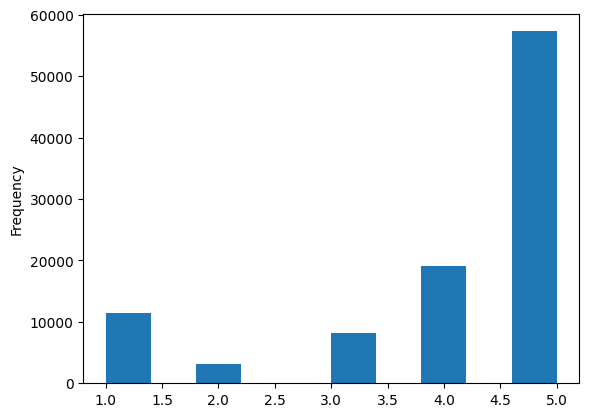

In [368]:
reviews['nota_review'].plot(kind='hist')

# Integração

## Unindo os DataFrames

In [369]:
# Unindo os dataframes

# Unir pedidos com clientes
df_merged = pd.merge(pedidos, clientes, on='id_cliente', how='left')

# Unir o resultado com pedidosItens
df_merged = pd.merge(df_merged, pedidosItens, on='id_pedido', how='left')

# Unir o resultado com produtos
df_merged = pd.merge(df_merged, produtos, on='id_produto', how='left')

# Unir o resultado com vendedores
df_merged = pd.merge(df_merged, vendedores, on='id_vendedor', how='left')

# Unir o resultado com pagamento
df_merged = pd.merge(df_merged, pagamento, on='id_pedido', how='left')

# Unir o resultado com reviews
df_merged = pd.merge(df_merged, reviews, on='id_pedido', how='left')

# Unir o resultado com categoriaProduto
df_merged = pd.merge(df_merged, categoriaProduto, on='categoria_produto', how='left')

display(df_merged.head())

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_cliente_unico,prefixo_cep_cliente,...,tipo_pagamento,parcelas_pagamento,valor_pagamento,id_review,nota_review,titulo_comentario_review,mensagem_comentario_review,data_criacao_review,timestamp_resposta_review,categoria_produto_ingles
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto


In [370]:
ecommerce = df_merged.copy()
display(ecommerce.head())

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_cliente_unico,prefixo_cep_cliente,...,tipo_pagamento,parcelas_pagamento,valor_pagamento,id_review,nota_review,titulo_comentario_review,mensagem_comentario_review,data_criacao_review,timestamp_resposta_review,categoria_produto_ingles
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto


In [371]:
display(ecommerce.columns)

Index(['id_pedido', 'id_cliente', 'status_pedido', 'data_compra',
       'data_aprovacao', 'data_entrega_transportadora', 'data_entrega_cliente',
       'data_entrega_estimada', 'id_cliente_unico', 'prefixo_cep_cliente',
       'cidade_cliente', 'estado_cliente', 'id_item_pedido', 'id_produto',
       'id_vendedor', 'data_limite_envio', 'preco', 'valor_frete',
       'categoria_produto', 'tamanho_nome_produto',
       'tamanho_descricao_produto', 'quantidade_fotos_produto',
       'peso_produto_g', 'comprimento_produto_cm', 'altura_produto_cm',
       'largura_produto_cm', 'prefixo_cep_vendedor', 'cidade_vendedor',
       'estado_vendedor', 'sequencia_pagamento', 'tipo_pagamento',
       'parcelas_pagamento', 'valor_pagamento', 'id_review', 'nota_review',
       'titulo_comentario_review', 'mensagem_comentario_review',
       'data_criacao_review', 'timestamp_resposta_review',
       'categoria_produto_ingles'],
      dtype='object')

In [372]:
colunas_para_apagar = [
    'id_item_pedido',
    'id_review',
    'titulo_comentario_review',
    'categoria_produto_ingles',
    'prefixo_cep_cliente',
    'prefixo_cep_vendedor',
    'tamanho_nome_produto',
    'tamanho_descricao_produto',
    'quantidade_fotos_produto',
    'sequencia_pagamento',
    'timestamp_resposta_review',
    'altura_produto_cm',
    'largura_produto_cm',
    'comprimento_produto_cm',
    'peso_produto_g',
    'data_criacao_review'
]

ecommerce = ecommerce.drop(columns=colunas_para_apagar)
display(ecommerce.head())

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_cliente_unico,cidade_cliente,...,preco,valor_frete,categoria_produto,cidade_vendedor,estado_vendedor,tipo_pagamento,parcelas_pagamento,valor_pagamento,nota_review,mensagem_comentario_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,credit_card,1.0,18.12,4.0,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,voucher,1.0,2.00,4.0,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,voucher,1.0,18.59,4.0,"Não testei o produto ainda, mas ele veio corre..."
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,...,118.70,22.76,perfumaria,belo horizonte,SP,boleto,1.0,141.46,4.0,Muito bom o produto.
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,...,159.90,19.22,automotivo,guariba,SP,credit_card,3.0,179.12,5.0,NaN


# Tratamento dos Dados

## Analisando os nulos

In [373]:
ecommerce.isnull().sum()

,0
id_pedido,0
id_cliente,0
status_pedido,0
data_compra,0
data_aprovacao,177
data_entrega_transportadora,2086
data_entrega_cliente,3421
data_entrega_estimada,0
id_cliente_unico,0
cidade_cliente,0


In [374]:
# Filtrando as linhas onde 'data_aprovacao' é nulo
nulos_data_aprovacao = ecommerce[ecommerce['data_aprovacao'].isnull()]

# Verificando a distribuição de 'status_pedido' nessas linhas
display(nulos_data_aprovacao['status_pedido'].value_counts())

,count
status_pedido,
canceled,157
delivered,15
created,5


In [375]:
# Filtrando para casos onde data_aprovacao é nulo e status_pedido é 'delivered' ou 'created'
casos_incomuns_aprovacao = ecommerce[
    ecommerce['data_aprovacao'].isnull() &
    (ecommerce['status_pedido'].isin(['delivered', 'created']))
]

# Removendo esses casos do dataframe principal
ecommerce = ecommerce.drop(casos_incomuns_aprovacao.index)

# Exibindo o número de linhas restantes para confirmar a remoção
display(ecommerce.shape)

(119123, 24)

In [376]:
display(ecommerce.columns)

Index(['id_pedido', 'id_cliente', 'status_pedido', 'data_compra',
       'data_aprovacao', 'data_entrega_transportadora', 'data_entrega_cliente',
       'data_entrega_estimada', 'id_cliente_unico', 'cidade_cliente',
       'estado_cliente', 'id_produto', 'id_vendedor', 'data_limite_envio',
       'preco', 'valor_frete', 'categoria_produto', 'cidade_vendedor',
       'estado_vendedor', 'tipo_pagamento', 'parcelas_pagamento',
       'valor_pagamento', 'nota_review', 'mensagem_comentario_review'],
      dtype='object')

In [377]:
# Descartando linhas com valores nulos na coluna 'id_produto'
ecommerce.dropna(subset=['id_produto'], inplace=True)

# Exibindo o número de linhas restantes para confirmar a remoção
display(ecommerce.shape)

(118295, 24)

In [378]:
# Filtrando as linhas onde 'data_entrega_cliente' é nulo
nulos_data_entrega_cliente = ecommerce[ecommerce['data_entrega_cliente'].isnull()]

# Verificando a distribuição de 'status_pedido' nessas linhas
display(nulos_data_entrega_cliente['status_pedido'].value_counts())

,count
status_pedido,
shipped,1255
canceled,563
invoiced,376
processing,376
delivered,8
unavailable,7
approved,3


In [379]:
ecommerce.shape

(118295, 24)

In [380]:
# Filtrando para casos onde data_entrega_cliente é nulo e status_pedido é 'delivered'
casos_incomuns_entrega = ecommerce[
    ecommerce['data_entrega_cliente'].isnull() &
    (ecommerce['status_pedido'] == 'delivered')
]

# Removendo esses casos do dataframe principal
ecommerce = ecommerce.drop(casos_incomuns_entrega.index)

# Exibindo o número de linhas restantes para confirmar a remoção
display(ecommerce.shape)

(118287, 24)

In [381]:
# Filtrando as linhas onde 'data_entrega_transportadora' é nulo
nulos_data_entrega_transportadora = ecommerce[ecommerce['data_entrega_transportadora'].isnull()]

# Verificando a distribuição de 'status_pedido' nessas linhas
display(nulos_data_entrega_cliente['status_pedido'].value_counts())

,count
status_pedido,
shipped,1255
canceled,563
invoiced,376
processing,376
delivered,8
unavailable,7
approved,3


In [382]:
# Filtrando para casos onde data_entrega_transportadora é nulo e status_pedido é 'delivered'
casos_incomuns_entrega = ecommerce[
    ecommerce['data_entrega_transportadora'].isnull() &
    (ecommerce['status_pedido'] == 'delivered')
]

# Removendo esses casos do dataframe principal
ecommerce = ecommerce.drop(casos_incomuns_entrega.index)

# Exibindo o número de linhas restantes para confirmar a remoção
display(ecommerce.shape)

(118286, 24)

In [383]:
# Filtrando as linhas onde 'data_limite_envio' OU 'id_produto' era nulo no dataframe original (df_merged)
nulos_limite_envio_ou_id_produto = df_merged[
    df_merged['data_limite_envio'].isnull() | df_merged['id_produto'].isnull()
]

# Exibindo as colunas 'id_produto', 'data_limite_envio' e 'status_pedido' para essas linhas
display(nulos_limite_envio_ou_id_produto[['id_produto', 'data_limite_envio', 'status_pedido']])

,id_produto,data_limite_envio,status_pedido
319,NaN,NaN,unavailable
702,NaN,NaN,unavailable
828,NaN,NaN,unavailable
887,NaN,NaN,unavailable
1362,NaN,NaN,canceled
...,...,...,...
118914,NaN,NaN,unavailable
118946,NaN,NaN,canceled
119039,NaN,NaN,canceled
119040,NaN,NaN,unavailable


In [385]:
ecommerce.shape


(118286, 24)

In [386]:
# Descartando linhas com valores nulos nas colunas de pagamento
colunas_pagamento = ['tipo_pagamento', 'parcelas_pagamento', 'valor_pagamento']
ecommerce.dropna(subset=colunas_pagamento, inplace=True)

# Exibindo o número de linhas restantes para confirmar a remoção
display(ecommerce.shape)

(118283, 24)

In [387]:
ecommerce.isnull().sum()

,0
id_pedido,0
id_cliente,0
status_pedido,0
data_compra,0
data_aprovacao,0
data_entrega_transportadora,1252
data_entrega_cliente,2580
data_entrega_estimada,0
id_cliente_unico,0
cidade_cliente,0


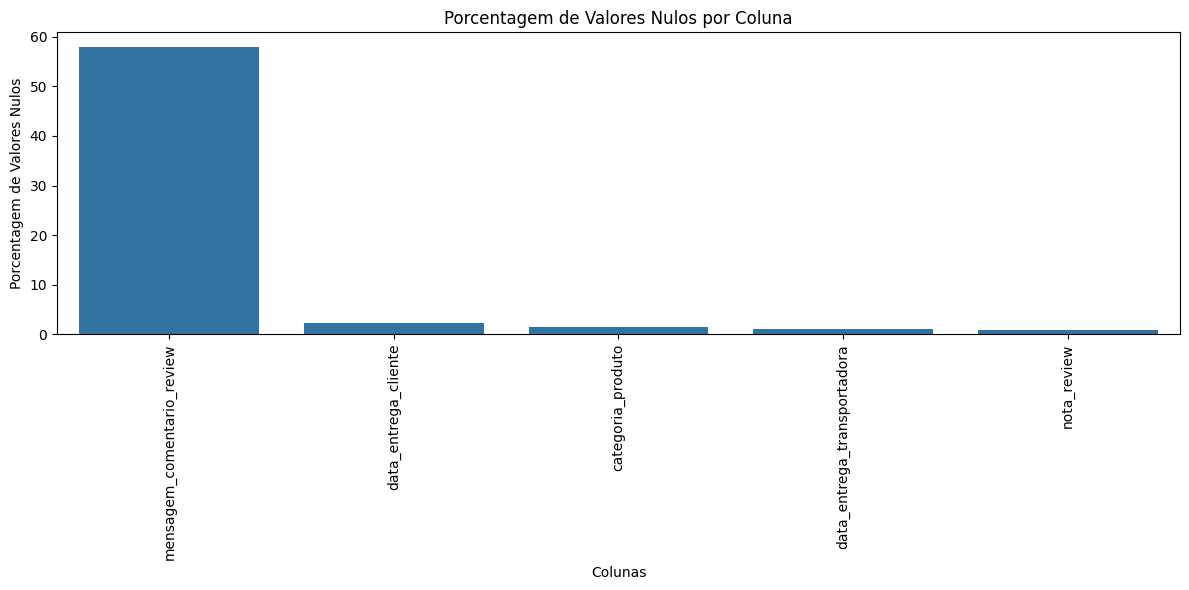

In [388]:
# Calcular a porcentagem de valores nulos por coluna
percentual_nulos = ecommerce.isnull().sum() / len(ecommerce) * 100

# Filtrar apenas as colunas com valores nulos (opcional, para focar no que importa)
percentual_nulos = percentual_nulos[percentual_nulos > 0].sort_values(ascending=False)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=percentual_nulos.index, y=percentual_nulos.values)
plt.xticks(rotation=90)
plt.xlabel('Colunas')
plt.ylabel('Porcentagem de Valores Nulos')
plt.title('Porcentagem de Valores Nulos por Coluna')
plt.tight_layout()
plt.show()

In [391]:
ecommerce.to_csv('ecommerce_limpo.csv', index=False)
print("DataFrame 'ecommerce' salvo como 'ecommerce_limpo.csv'")

DataFrame 'ecommerce' salvo como 'ecommerce_limpo.csv'


## Convertendo colunas de data

In [392]:
ecommerce.head()

,id_pedido,id_cliente,status_pedido,data_compra,data_aprovacao,data_entrega_transportadora,data_entrega_cliente,data_entrega_estimada,id_cliente_unico,cidade_cliente,...,preco,valor_frete,categoria_produto,cidade_vendedor,estado_vendedor,tipo_pagamento,parcelas_pagamento,valor_pagamento,nota_review,mensagem_comentario_review
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,credit_card,1.0,18.12,4.0,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,voucher,1.0,2.00,4.0,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,29.99,8.72,utilidades_domesticas,maua,SP,voucher,1.0,18.59,4.0,"Não testei o produto ainda, mas ele veio corre..."
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,barreiras,...,118.70,22.76,perfumaria,belo horizonte,SP,boleto,1.0,141.46,4.0,Muito bom o produto.
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,...,159.90,19.22,automotivo,guariba,SP,credit_card,3.0,179.12,5.0,NaN


In [393]:
# Colunas de data a serem convertidas
colunas_data = [
    'data_compra',
    'data_aprovacao',
    'data_entrega_transportadora',
    'data_entrega_cliente',
    'data_entrega_estimada',
    'data_limite_envio'
]

# Converter as colunas para o tipo datetime
for col in colunas_data:
    ecommerce[col] = pd.to_datetime(ecommerce[col], errors='coerce')

# Verificar os tipos de dados após a conversão
display(ecommerce.info())

<class 'pandas.core.frame.DataFrame'>
Index: 118283 entries, 0 to 119142
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id_pedido                    118283 non-null  object        
 1   id_cliente                   118283 non-null  object        
 2   status_pedido                118283 non-null  object        
 3   data_compra                  118283 non-null  datetime64[ns]
 4   data_aprovacao               118283 non-null  datetime64[ns]
 5   data_entrega_transportadora  117031 non-null  datetime64[ns]
 6   data_entrega_cliente         115703 non-null  datetime64[ns]
 7   data_entrega_estimada        118283 non-null  datetime64[ns]
 8   id_cliente_unico             118283 non-null  object        
 9   cidade_cliente               118283 non-null  object        
 10  estado_cliente               118283 non-null  object        
 11  id_produto                   11

None

Próximos passos:

Engenharia de Features: Criar novas colunas úteis para a análise a partir das colunas existentes (por exemplo, tempo entre a compra e a entrega, dia da semana da compra, etc.).

Análise Aprofundada e Visualização: Começar a fazer perguntas sobre os dados e visualizá-los para encontrar padrões e insights.